In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv('Online Retail Data Set.csv', encoding='latin1')

# 1. Data Cleaning
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Filter out negative quantities and unit prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Add a new column for total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# 2. Feature Selection
features = ['Quantity', 'UnitPrice', 'TotalPrice']
X = data[features]

# 3. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio by Principal Components:", explained_variance)




Explained Variance Ratio by Principal Components: [0.63921071 0.33360277]


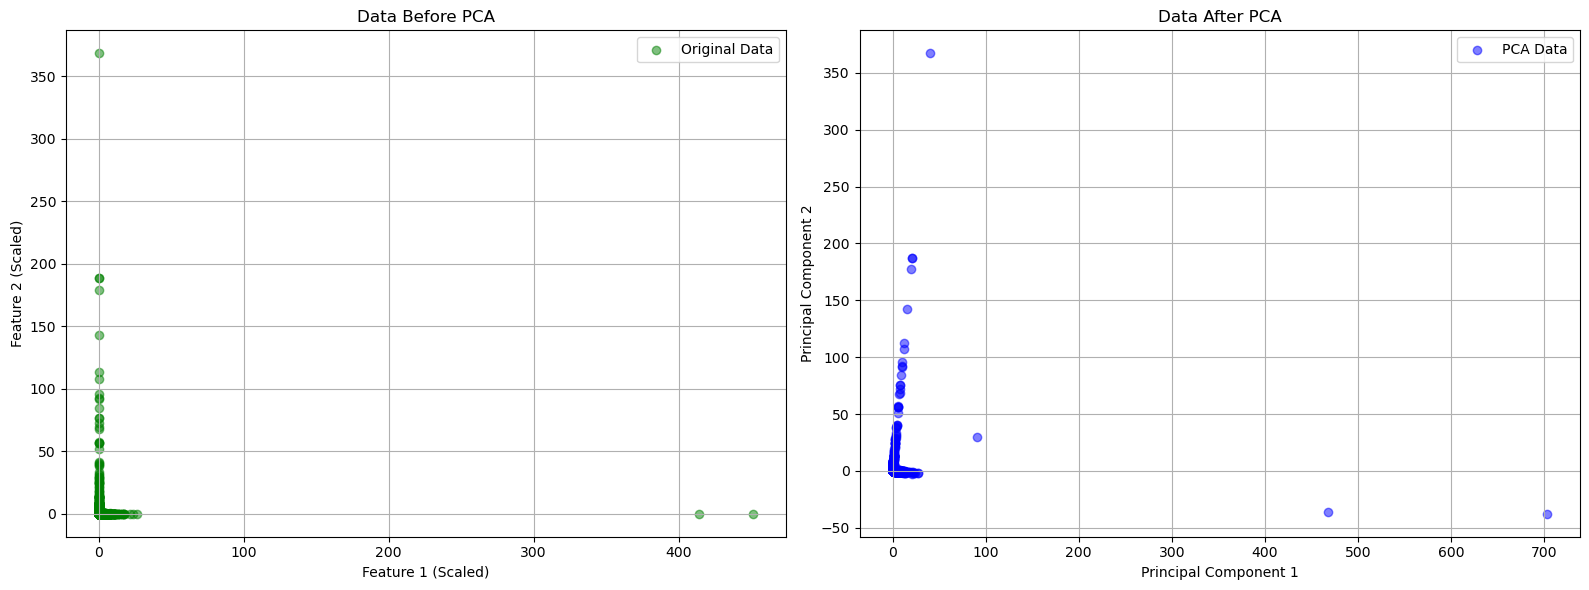

In [4]:
# 5. Visualization: Before and After PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before PCA
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c='green', alpha=0.5, label='Original Data')
axes[0].set_xlabel('Feature 1 (Scaled)')
axes[0].set_ylabel('Feature 2 (Scaled)')
axes[0].set_title('Data Before PCA')
axes[0].legend()
axes[0].grid()

# After PCA
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5, label='PCA Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('Data After PCA')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()